<a href="https://colab.research.google.com/github/izeeqpotter/Breast_Cancer/blob/main/MyLatestProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Using this csv file, I want to create a model to tell if a student passed or failed in Jamb

Load the data

In [23]:
import pandas as pd
df=pd.read_csv('/content/jamb_exam_results.csv')
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


Explore the data

Let's explore the data to understand its characteristics. We will start by looking at descriptive statistics and checking for missing values.

In [24]:
# Display descriptive statistics for numerical columns
display(df.describe())

# Display information about the DataFrame, including data types and non-null values
display(df.info())

# Check for missing values
display(df.isnull().sum())

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

None

,0
JAMB_Score,0
Study_Hours_Per_Week,0
Attendance_Rate,0
Teacher_Quality,0
Distance_To_School,0
School_Type,0
School_Location,0
Extra_Tutorials,0
Access_To_Learning_Materials,0
Parent_Involvement,0


Now let's visualize the distribution of some of the key features.

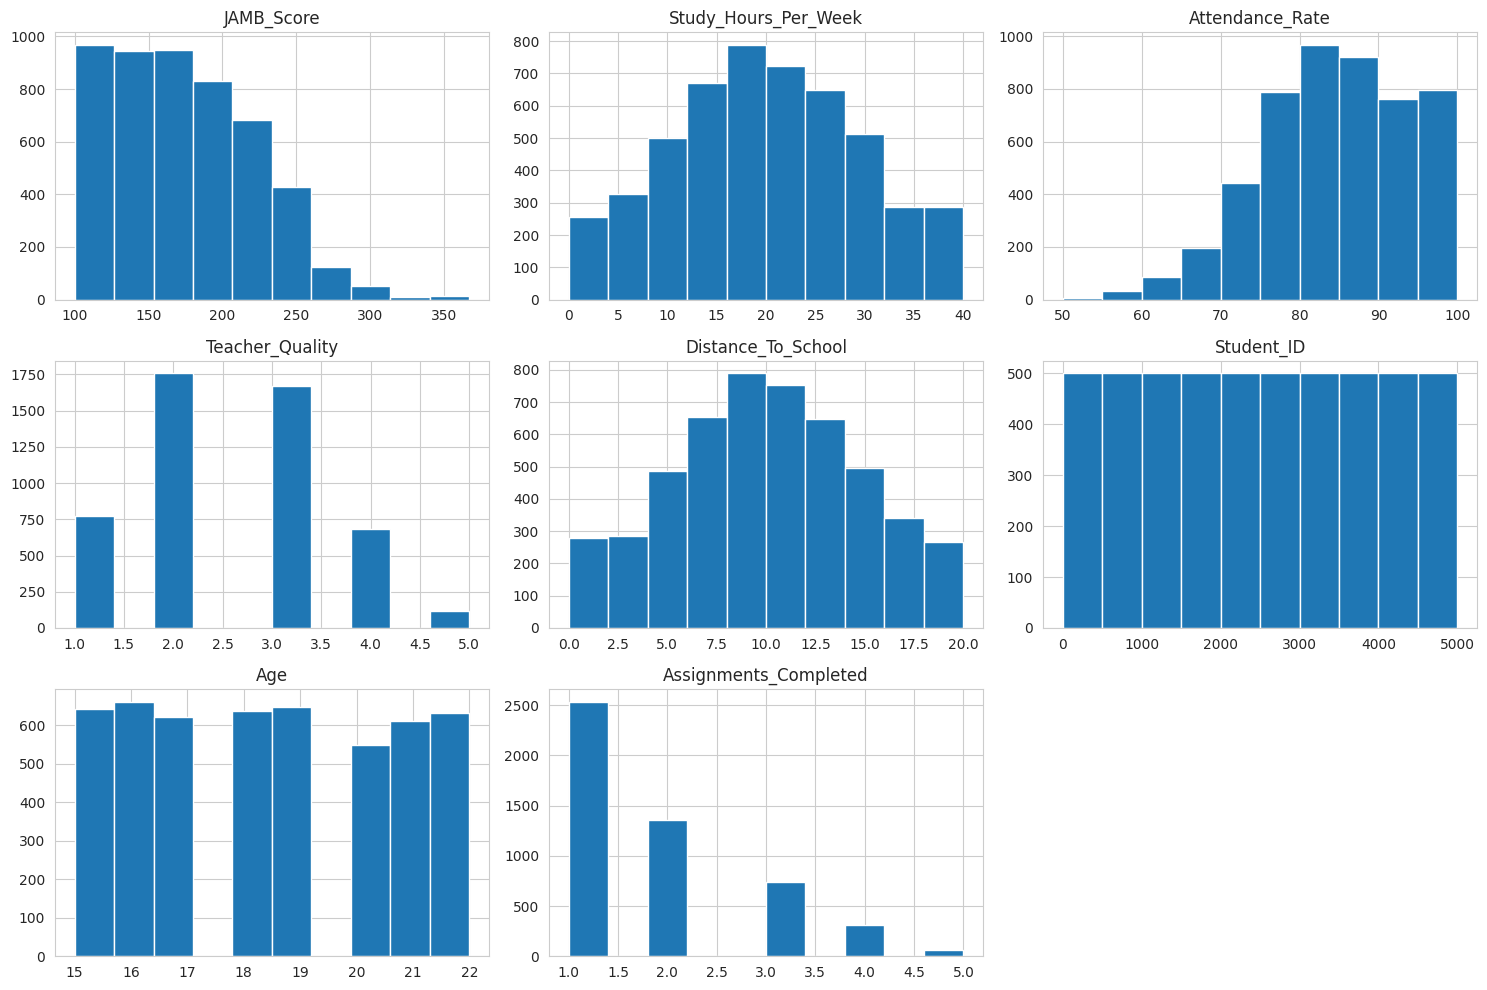

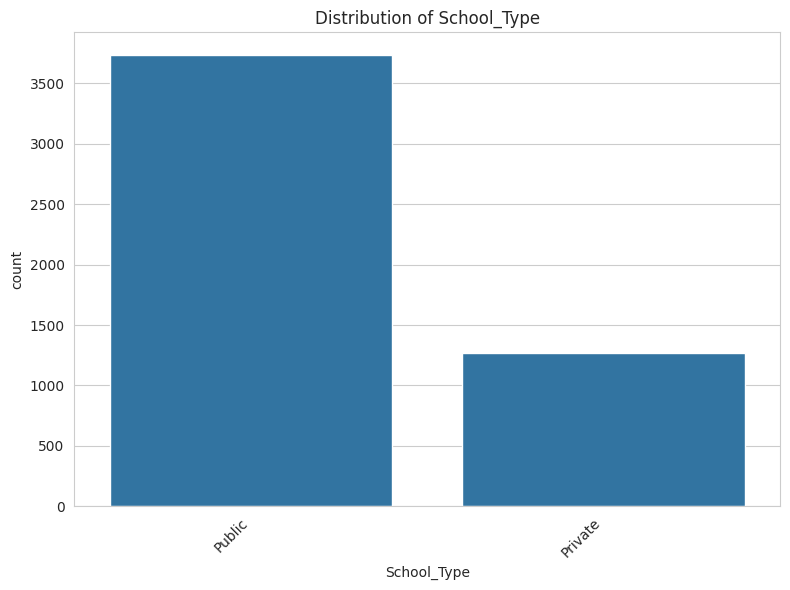

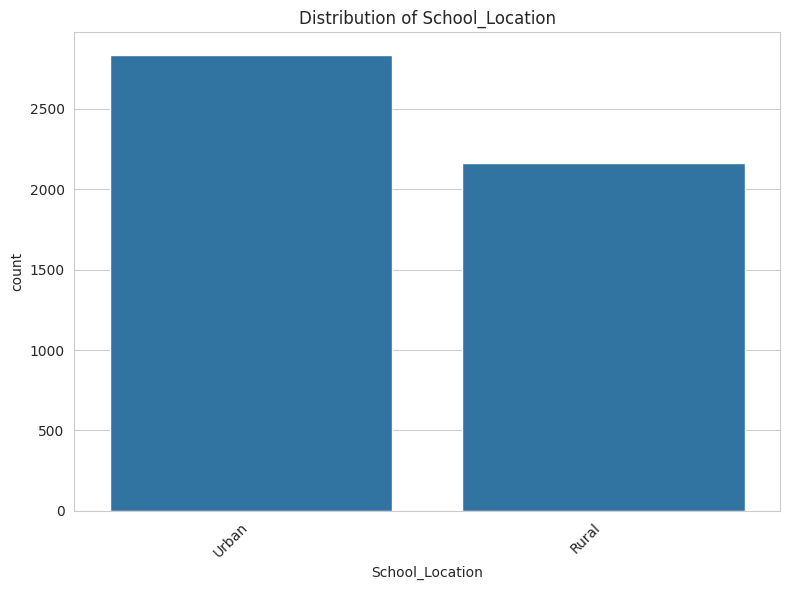

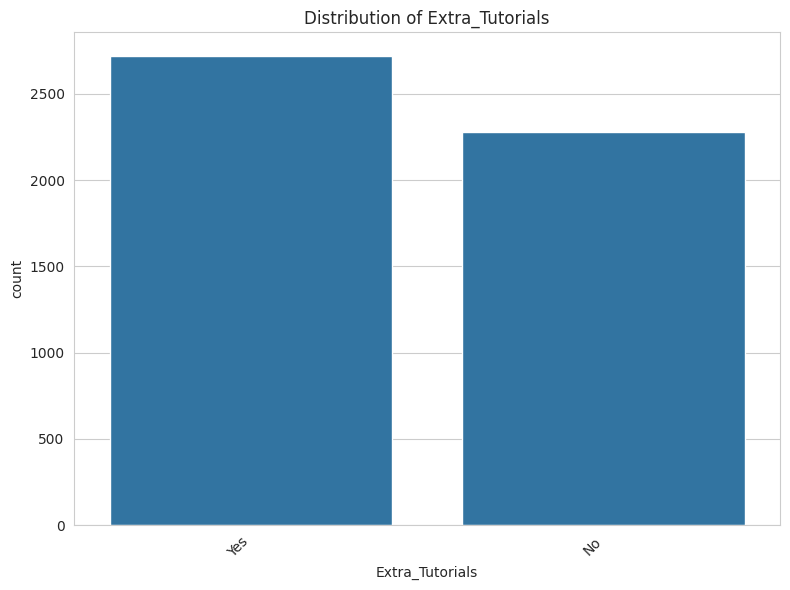

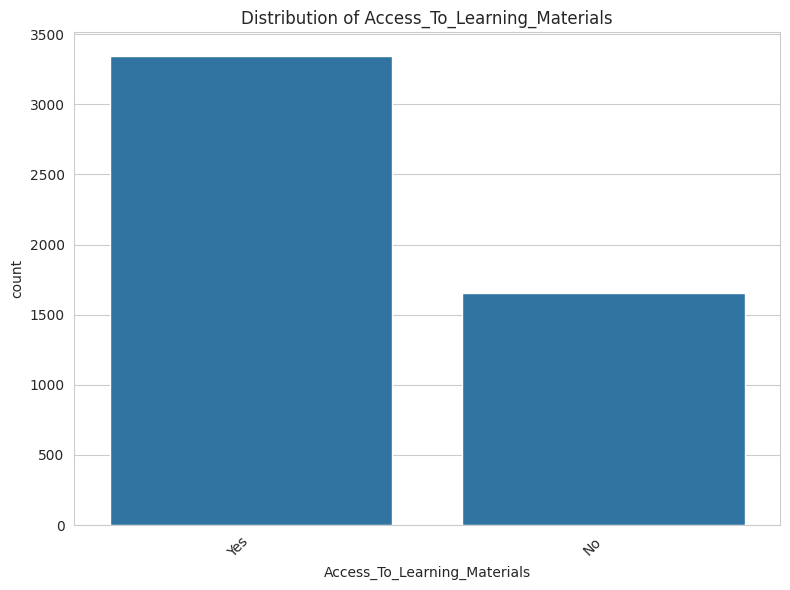

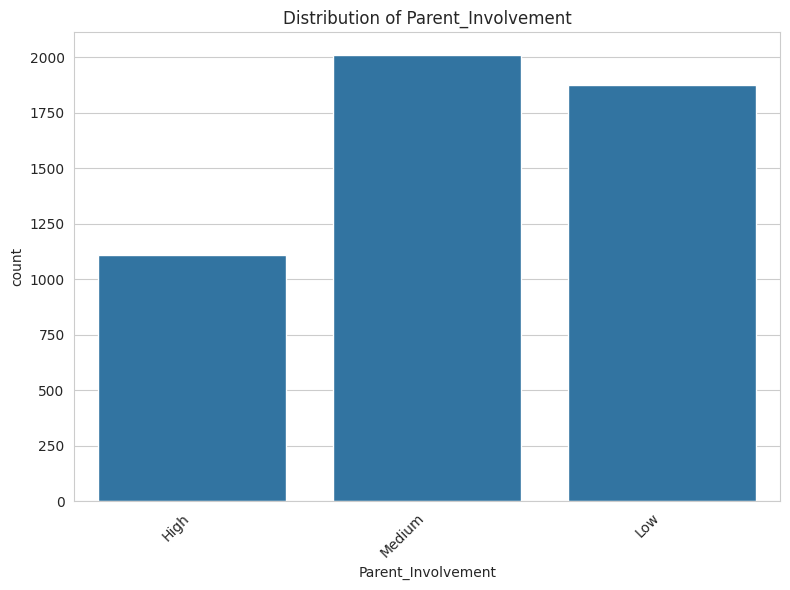

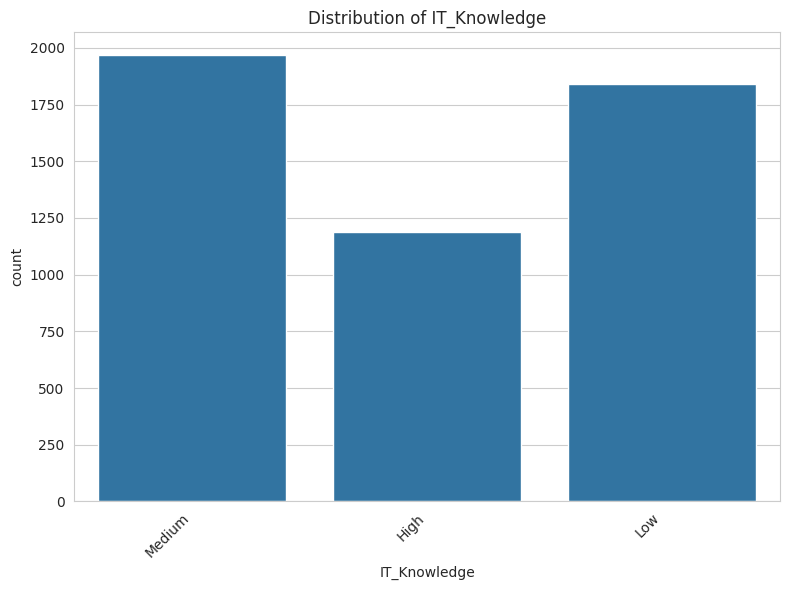

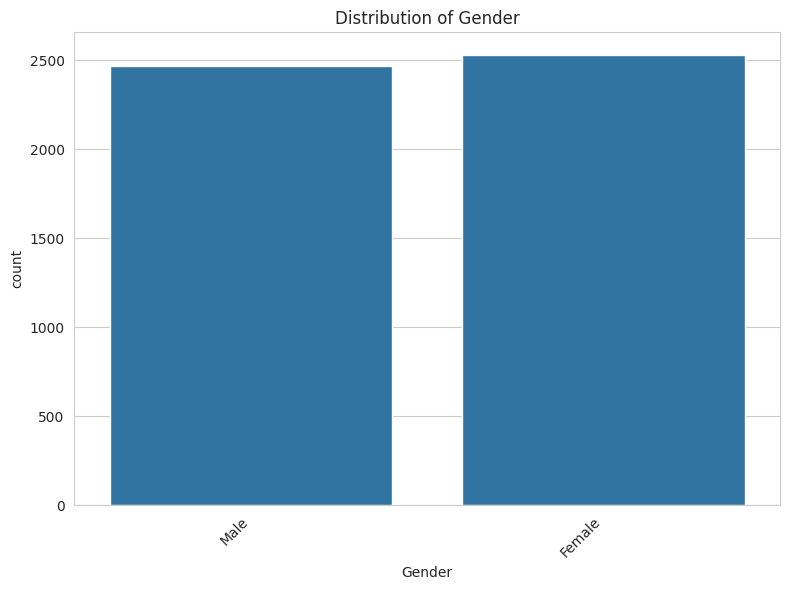

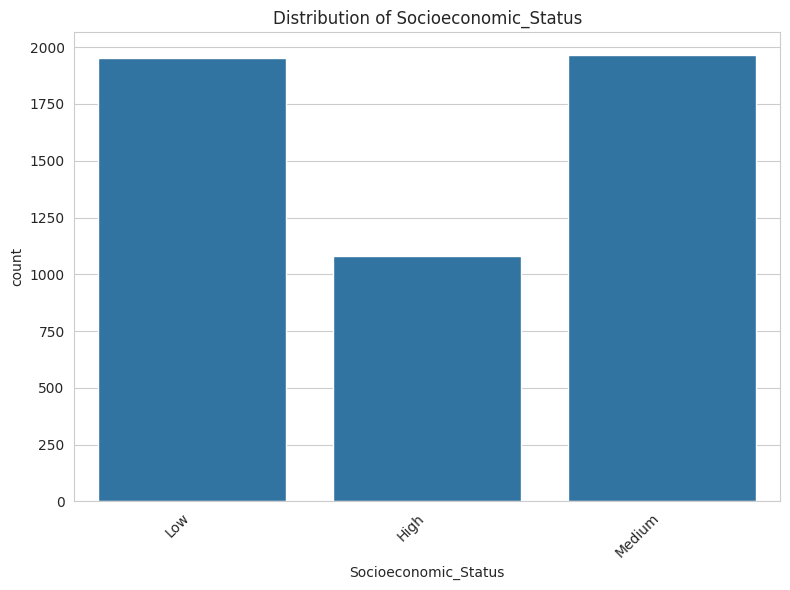

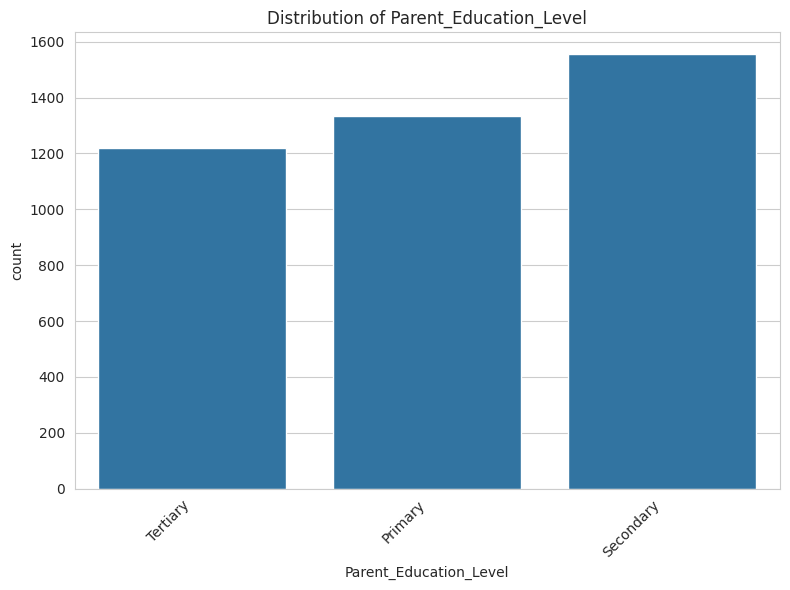

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create histograms for numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Create count plots for categorical features
categorical_cols = ['School_Type', 'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials', 'Parent_Involvement', 'IT_Knowledge', 'Gender', 'Socioeconomic_Status', 'Parent_Education_Level']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Preprocess the data

Let's preprocess the data. We will handle missing values, encode categorical features, and split the data into training and testing sets.

In [26]:
# Handle missing values in 'Parent_Education_Level' by filling with the mode
df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0], inplace=True)

# Check if missing values are handled
display(df.isnull().sum())

/tmp/ipython-input-2499301425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0], inplace=True)


,0
JAMB_Score,0
Study_Hours_Per_Week,0
Attendance_Rate,0
Teacher_Quality,0
Distance_To_School,0
School_Type,0
School_Location,0
Extra_Tutorials,0
Access_To_Learning_Materials,0
Parent_Involvement,0


In [27]:
# Define the target variable 'Passed' based on JAMB_Score (assuming passing score is 180)
df['Passed'] = (df['JAMB_Score'] >= 180).astype(int)

# Select features (X) and target (y)
X = df.drop(['JAMB_Score', 'Student_ID', 'Passed'], axis=1)
y = df['Passed']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Perform one-hot encoding on categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display the first few rows of the preprocessed features
display(X.head())

,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Age,Assignments_Completed,School_Type_Public,School_Location_Urban,Extra_Tutorials_Yes,Access_To_Learning_Materials_Yes,Parent_Involvement_Low,Parent_Involvement_Medium,IT_Knowledge_Low,IT_Knowledge_Medium,Gender_Male,Socioeconomic_Status_Low,Socioeconomic_Status_Medium,Parent_Education_Level_Secondary,Parent_Education_Level_Tertiary
0,22,78,4,12.4,17,2,True,True,True,True,False,False,False,True,True,True,False,False,True
1,14,88,4,2.7,15,1,True,False,False,True,False,False,False,False,True,False,False,True,False
2,29,87,2,9.6,20,2,True,False,True,True,False,False,False,True,False,False,False,False,True
3,29,99,2,2.6,22,1,True,True,False,True,False,True,False,False,False,False,True,False,True
4,12,98,3,8.8,22,1,True,True,False,True,False,True,False,True,False,False,True,False,True


In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTesting set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set shapes:
X_train: (4000, 19)
y_train: (4000,)

Testing set shapes:
X_test: (1000, 19)
y_test: (1000,)


Let's build and train a Logistic Regression model.

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Now, let's evaluate the model's performance on the test set.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7130
Precision: 0.6824
Recall: 0.6336
F1-Score: 0.6571
ROC AUC Score: 0.7744

Confusion Matrix:


array([[438, 128],
       [159, 275]])


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       566
           1       0.68      0.63      0.66       434

    accuracy                           0.71      1000
   macro avg       0.71      0.70      0.71      1000
weighted avg       0.71      0.71      0.71      1000



INTERPRETATION

Here's an interpretation of the model's evaluation metrics:

Accuracy (0.7130): This means the model correctly predicted the outcome (pass or fail) for about 71.3% of the students in the test set. It's a general measure of how well the model performs overall.
Precision (0.6824): Of all the students the model predicted would pass, about 68.24% actually passed. This metric is important when the cost of a false positive (predicting a pass when the student fails) is high.
Recall (0.6336): Of all the students who actually passed, the model correctly identified about 63.36% of them. This metric is important when the cost of a false negative (predicting a fail when the student passes) is high.
F1-Score (0.6571): This is the harmonic mean of precision and recall. It provides a single score that balances both metrics. A higher F1-score indicates a better balance between precision and recall.
ROC AUC Score (0.7744): This metric measures the model's ability to distinguish between the two classes (pass and fail). An AUC of 0.5 indicates the model performs no better than random chance, while an AUC of 1.0 indicates a perfect model. An AUC of 0.7744 suggests that the model has a reasonably good ability to distinguish between passing and failing students.
Confusion Matrix: The confusion matrix provides a breakdown of the model's predictions:
True Negatives (438): The model correctly predicted 438 students would fail.
False Positives (128): The model incorrectly predicted 128 students would pass when they actually failed.
False Negatives (159): The model incorrectly predicted 159 students would fail when they actually passed.
True Positives (275): The model correctly predicted 275 students would pass.
Classification Report: This report provides precision, recall, and f1-score for each class (0 for fail, 1 for pass), along with the support (number of actual instances in each class).
In summary, the model has a decent overall accuracy and ability to distinguish between classes, but there is room for improvement, particularly in terms of recall. The ConvergenceWarning during training also suggests that the model might benefit from further tuning or data scaling.